# Exploratory Data Analysis - Sepsis Prediction



## Data reading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)

In [3]:
train_data = pd.read_csv(f'/Users/ofrihefetz/PycharmProjects/lab2_hw1/data/train_df.csv')
test_data = pd.read_csv('/Users/ofrihefetz/PycharmProjects/lab2_hw1/data/test_df.csv')

In [2]:
Demographics_features = ['Age', 'Gender', 'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS']
Laboratory_features = ['BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos',
                       'Calcium','Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium',
                       'Phosphate','Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC', 'Fibrinogen','Platelets']
Vital_signs = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2']

## Features description

In [7]:
train_data.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,SepsisPatient
count,198948.000000,191740.000000,75066.000000,188133.000000,193068.000000,151466.000000,186666.000000,7089.000000,11859.000000,9128.000000,17710.000000,15226.000000,12114.000000,7538.000000,3459.000000,15132.000000,3420.000000,12930.000000,9867.000000,13409.000000,386.000000,38210.000000,5725.000000,13940.000000,8738.000000,20654.000000,3164.000000,2117.000000,19708.000000,16305.000000,6311.000000,14142.000000,1340.000000,13085.000000,220557.000000,220557.000000,136927.000000,136927.000000,220557.000000,220556.000000,220556.000000,220556.000000
mean,84.324223,97.173901,36.960473,123.622155,82.256869,63.869039,18.773104,32.855551,-0.730508,24.185665,0.520244,7.376840,41.301292,92.648468,261.359208,23.366045,101.334503,7.555731,105.726411,1.428206,2.017383,136.333819,2.685668,2.038181,3.514609,4.132608,2.054678,8.240208,30.767283,10.415989,42.059967,11.376431,274.398881,196.094192,62.245804,0.555707,0.493949,0.506051,-59.094598,25.806630,0.001873,0.090947
std,17.547306,2.895678,0.770541,23.386878,16.467483,14.049113,5.103866,7.680178,4.303692,4.437666,0.194399,0.075781,9.708705,10.775422,907.484057,19.591390,108.465087,2.471144,5.697985,1.600663,4.257357,49.307818,2.452366,0.383067,1.377415,0.643268,4.252164,27.575075,5.461688,1.953498,27.424562,8.589965,145.861283,99.299547,16.484733,0.496888,0.499965,0.499965,230.623234,26.052093,0.043232,0.287535
min,20.000000,20.000000,20.900000,20.000000,20.000000,20.000000,1.000000,10.000000,-29.000000,0.000000,0.000000,6.780000,11.000000,29.000000,5.000000,1.000000,7.000000,1.000000,75.000000,0.100000,0.010000,26.000000,0.400000,0.800000,0.300000,1.400000,0.100000,0.010000,8.800000,3.100000,18.500000,0.100000,35.000000,2.000000,15.000000,0.000000,0.000000,0.000000,-5366.860000,1.000000,0.000000,0.000000
25%,72.000000,96.000000,36.500000,106.500000,71.000000,54.000000,15.000000,28.500000,-3.000000,22.000000,0.400000,7.340000,36.000000,94.000000,22.000000,12.000000,53.000000,7.700000,102.000000,0.700000,0.200000,106.000000,1.300000,1.800000,2.700000,3.700000,0.500000,0.040000,27.000000,9.000000,27.900000,7.600000,179.000000,129.000000,52.000000,0.000000,0.000000,0.000000,-44.330000,11.000000,0.000000,0.000000
50%,83.000000,98.000000,37.000000,121.000000,80.000000,62.000000,18.000000,33.000000,0.000000,24.000000,0.500000,7.380000,40.000000,97.000000,40.000000,17.000000,74.000000,8.300000,106.000000,0.900000,0.500000,127.000000,1.900000,2.000000,3.300000,4.100000,0.800000,0.310000,30.300000,10.300000,32.600000,10.200000,242.000000,183.000000,64.350000,1.000000,0.000000,1.000000,-5.960000,21.000000,0.000000,0.000000
75%,95.500000,99.000000,37.450000,138.000000,92.000000,72.000000,22.000000,37.000000,1.000000,27.000000,0.545000,7.420000,45.000000,98.000000,101.000000,28.000000,111.250000,8.700000,109.000000,1.400000,1.700000,153.000000,3.100000,2.200000,4.100000,4.400000,1.600000,3.340000,34.100000,11.600000,43.800000,13.500000,333.250000,242.000000,74.650000,1.000000,1.000000,1.000000,-0.040000,34.000000,0.000000,0.000000
max,280.000000,100.000000,50.000000,298.000000,300.000000,298.000000,100.000000,100.000000,44.000000,48.000000,7.000000,7.780000,100.000000,100.000000,9961.000000,252.000000,2528.000000,27.000000,145.000000,21.110000,30.000000,871.000000,23.300000,9.700000,17.600000,13.000000,45.300000,440.000000,58.800000,23.800000,250.000000,440.000000,1000.000000,1111.000000,100.000000,1.000000,1.000000,1.000000,5.250000,336.000000,1.000000,1.000000


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220557 entries, 0 to 220556
Data columns (total 43 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HR                198948 non-null  float64
 1   O2Sat             191740 non-null  float64
 2   Temp              75066 non-null   float64
 3   SBP               188133 non-null  float64
 4   MAP               193068 non-null  float64
 5   DBP               151466 non-null  float64
 6   Resp              186666 non-null  float64
 7   EtCO2             7089 non-null    float64
 8   BaseExcess        11859 non-null   float64
 9   HCO3              9128 non-null    float64
 10  FiO2              17710 non-null   float64
 11  pH                15226 non-null   float64
 12  PaCO2             12114 non-null   float64
 13  SaO2              7538 non-null    float64
 14  AST               3459 non-null    float64
 15  BUN               15132 non-null   float64
 16  Alkalinephos      34

In [28]:
columns =train_data.columns.tolist()
print(f'The data includes {train_data.shape[0]} rows and {train_data.shape[1]} columns')
print(f'The number of patients is : {len(train_data["filename"].unique())}')
print(f'The number of duplicated rows = {train_data.duplicated().sum()}')


The data includes 220557 rows and 43 columns
The number of patients is : 5850
The number of duplicated rows = 0


In [4]:
print(f'The data includes {test_data.shape[0]} rows and {test_data.shape[1]} columns')
print(f'The number of patients is : {len(test_data["filename"].unique())}')
print(f'The number of duplicated rows = {test_data.duplicated().sum()}')

The data includes 379541 rows and 43 columns
The number of patients is : 10000
The number of duplicated rows = 0


### Unique Values

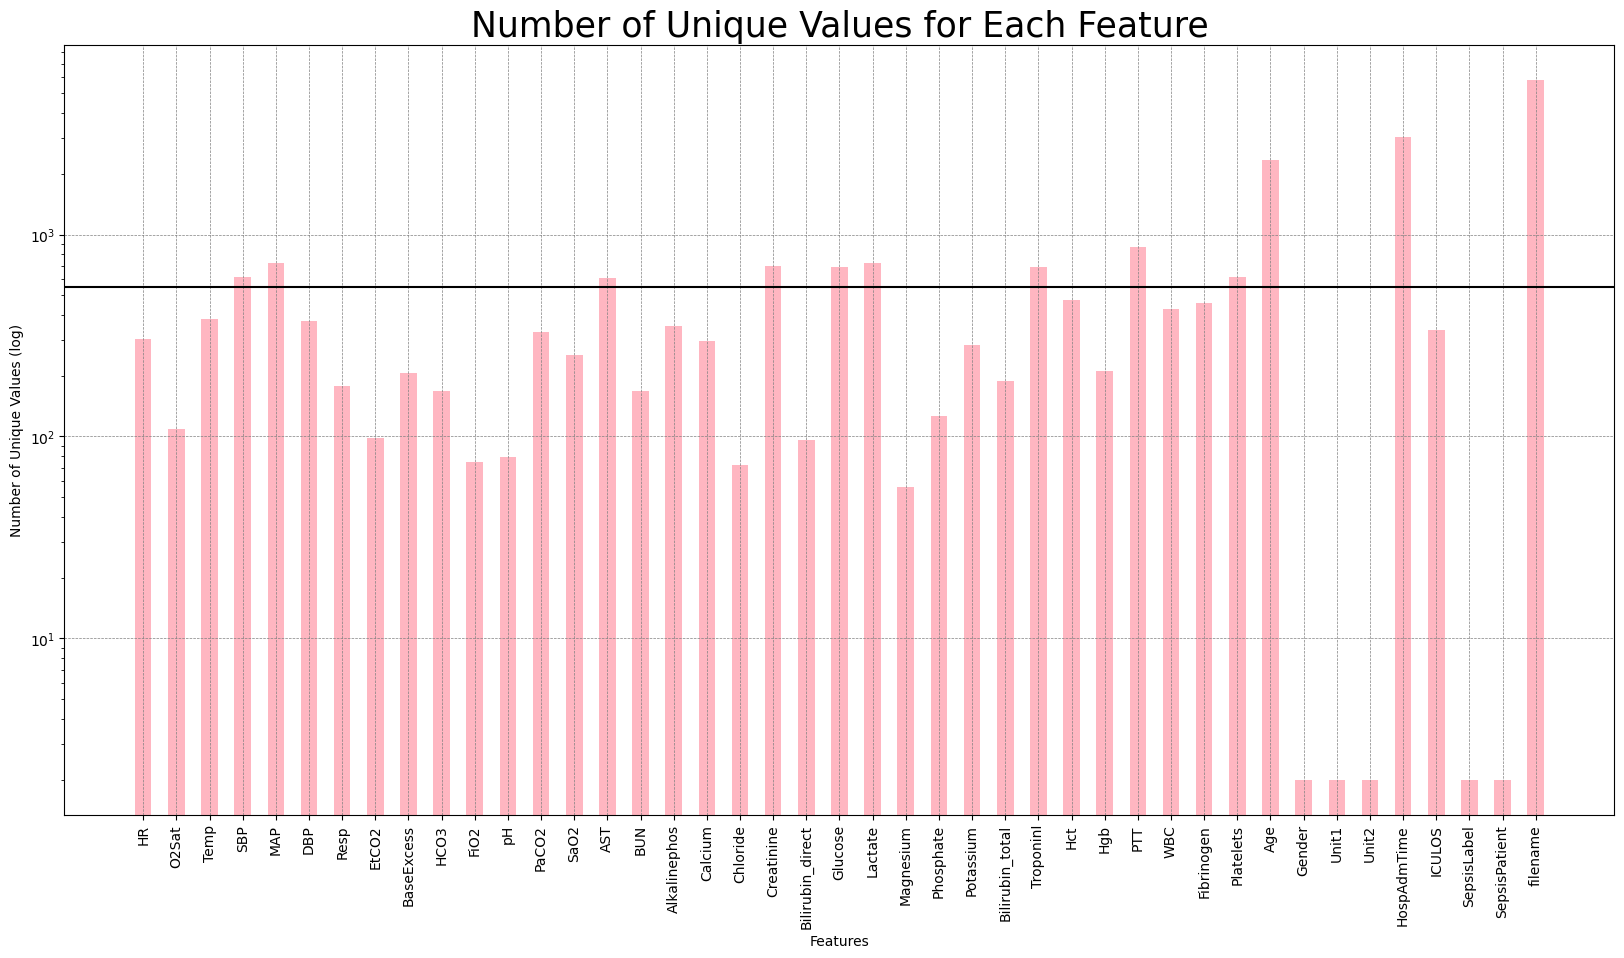

In [21]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(train_data.columns, train_data.nunique(), width=0.5, color='lightpink')
ax.set_xlabel('Features')
plt.xticks(rotation=90)
ax.set_yscale('log')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_ylabel('Number of Unique Values (log)')
# add horizontal line at mean value of y
plt.axhline(y=np.mean(train_data.nunique()), color='black')
ax.set_title('Number of Unique Values for Each Feature', fontsize=25)
plt.show()

### missing values

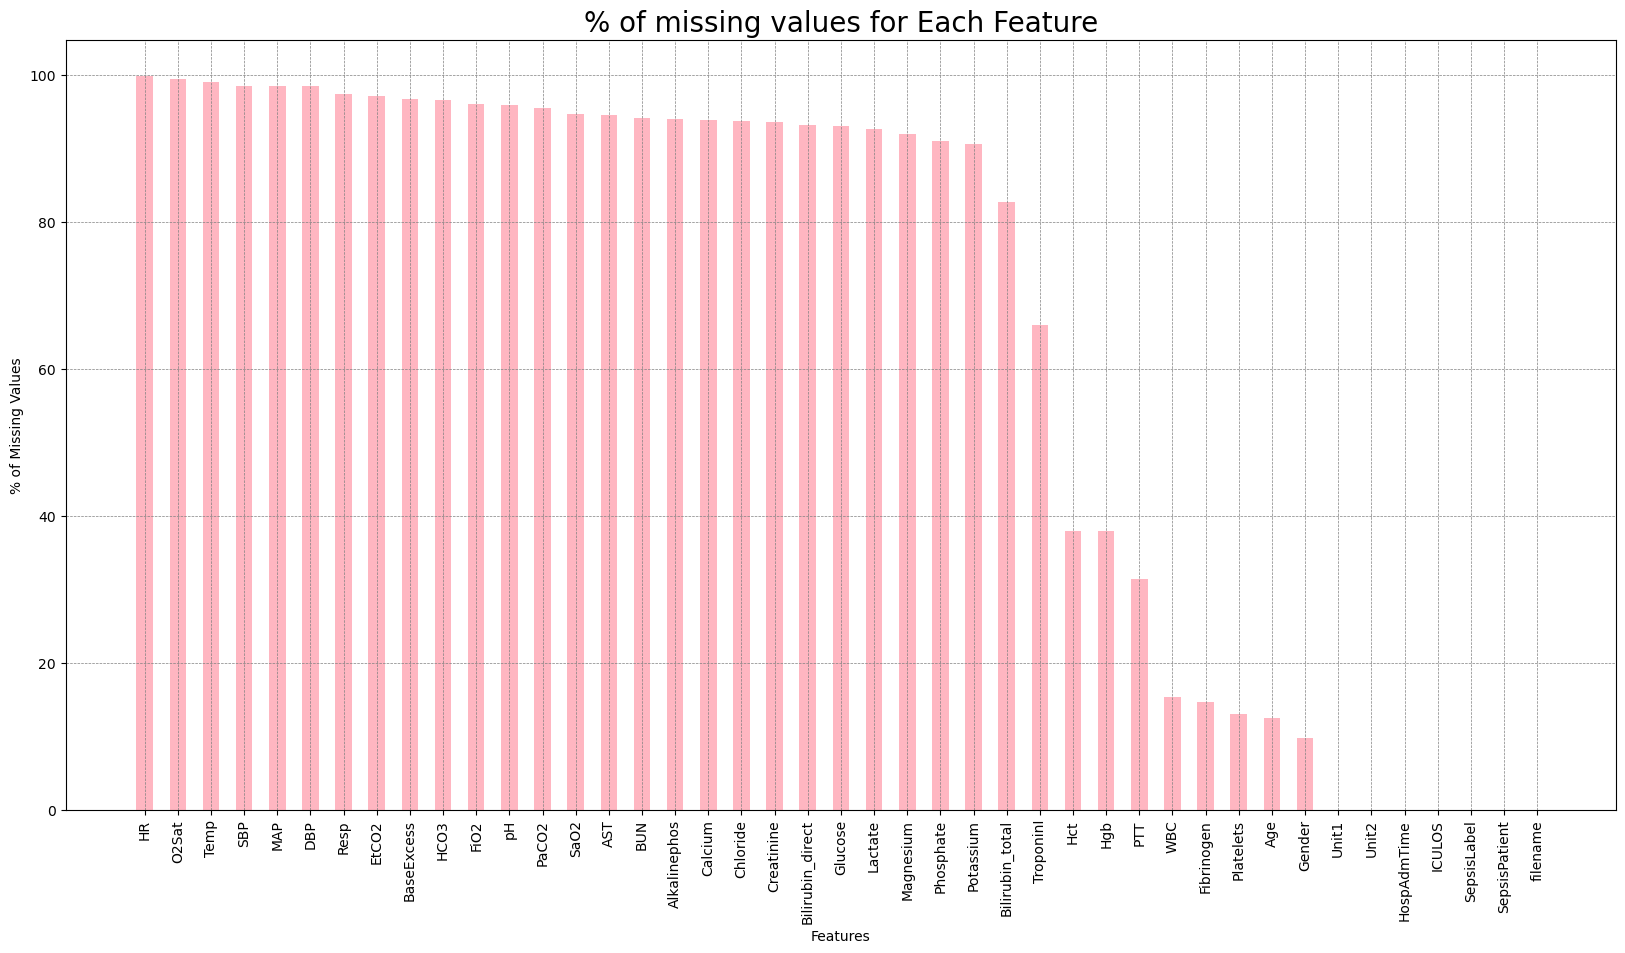

In [20]:
null_values = (train_data.isna().sum(axis=0).sort_values(ascending=False) / len(train_data)) * 100
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(train_data.columns, null_values, width=0.5, color='lightpink')
ax.set_xlabel('Features')
plt.xticks(rotation=90)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_ylabel('% of Missing Values')
ax.set_title('% of missing values for Each Feature', fontsize=20)
plt.show()

### Age Distribution

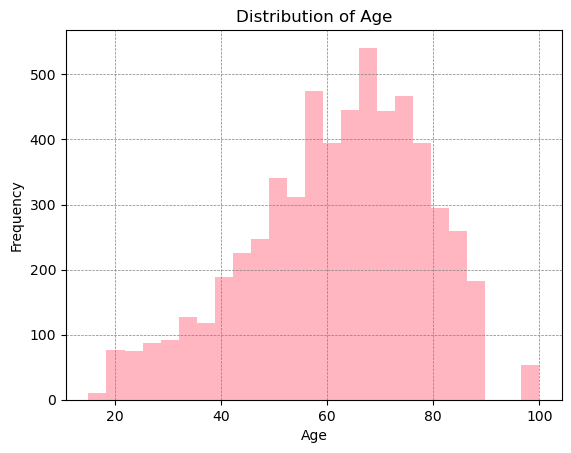

In [23]:
age_by_patient = train_data.groupby('filename')['Age'].mean()
plt.hist(age_by_patient, bins=25, color='lightpink')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

### Sepsis Distribution

Text(0.5, 1.0, 'Sepsis Distribution')

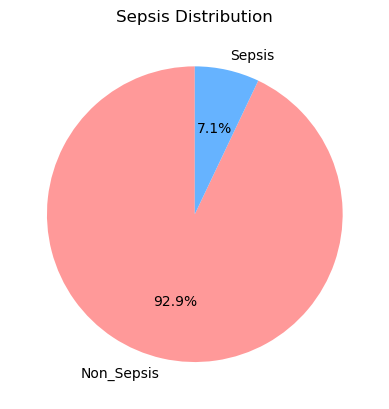

In [25]:
sepsis = len(train_data['filename'][train_data['SepsisLabel'] == 1].unique())
number_of_patients = len(train_data['filename'].unique())
not_sepsis = number_of_patients - sepsis
labels = ['Non_Sepsis', 'Sepsis']
sizes = [not_sepsis / number_of_patients, sepsis / number_of_patients]
colors = ['#ff9999', '#66b3ff']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Sepsis Distribution')

### Gender Distribution

Text(0.5, 1.0, 'Gender Distribution')

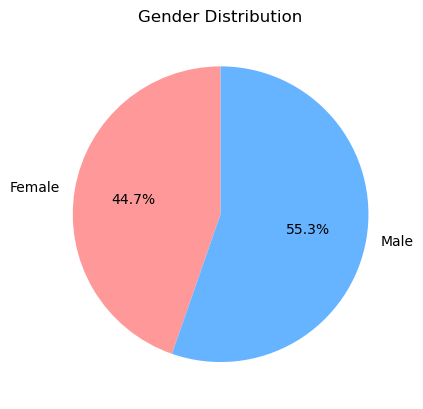

In [26]:
Male = len(train_data['filename'][train_data['Gender'] == 1].unique())
number_of_patients = len(train_data['filename'].unique())
Female = number_of_patients - Male
labels = ['Female', 'Male']
sizes = [Female / number_of_patients, Male / number_of_patients]
colors = ['#ff9999', '#66b3ff']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')

### Units Distribution

Text(0.5, 1.0, 'Number of patients per unit')

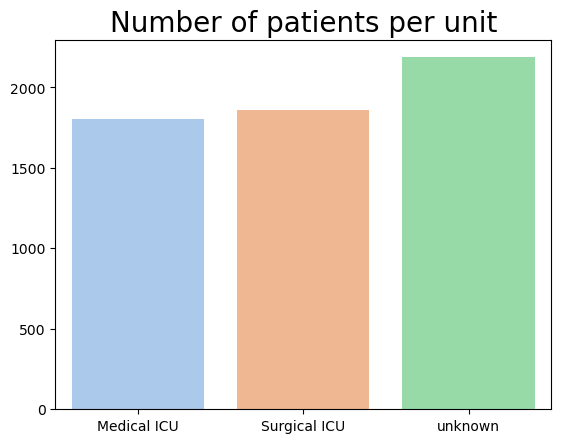

In [46]:
u1 = len(train_data['filename'][train_data['Unit1'] == 1].unique())
u2 = len(train_data['filename'][train_data['Unit2'] == 1].unique())
total_p = len(train_data['filename'].unique())
sns.barplot(x=["Medical ICU", "Surgical ICU", "unknown"], y=[u1, u2, total_p - u1 - u2], palette='pastel')
plt.title('Number of patients per unit', fontsize=20)


## Correlations

### correlations heat map

/var/folders/xd/kv4xn8px2lq0pllc33lwp5z00000gn/T/ipykernel_80169/2526611434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_data.corr()


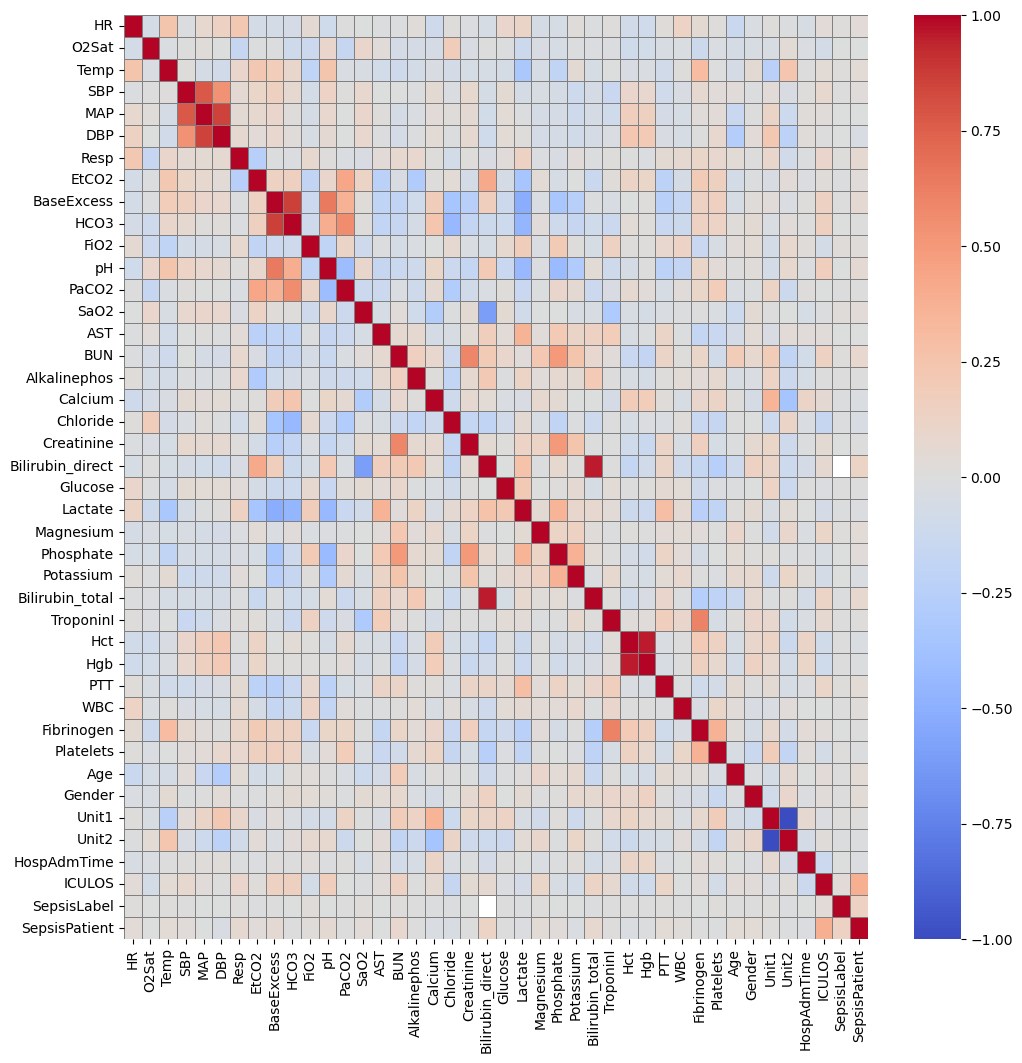

In [32]:
corr_matrix = train_data.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5, linecolor='gray')
plt.show()### correlations - Demographics_features

### Correlations - Demographics features

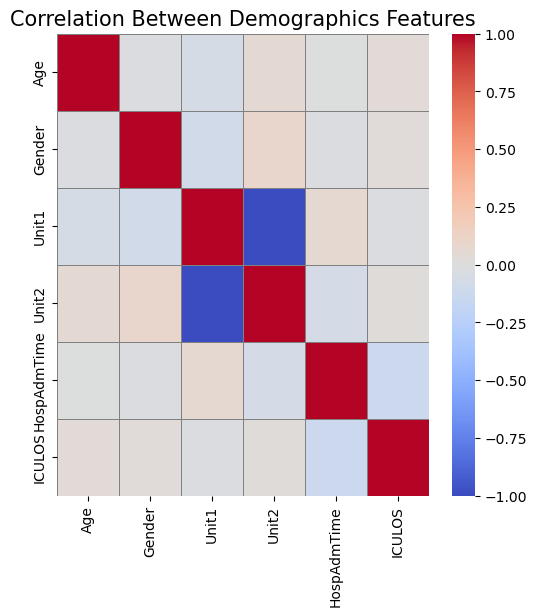

In [37]:
corr_matrix = train_data[Demographics_features].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5, linecolor='gray')
plt.title('Correlation Between Demographics Features', fontsize=15)
plt.show()

### Demographics features distribution

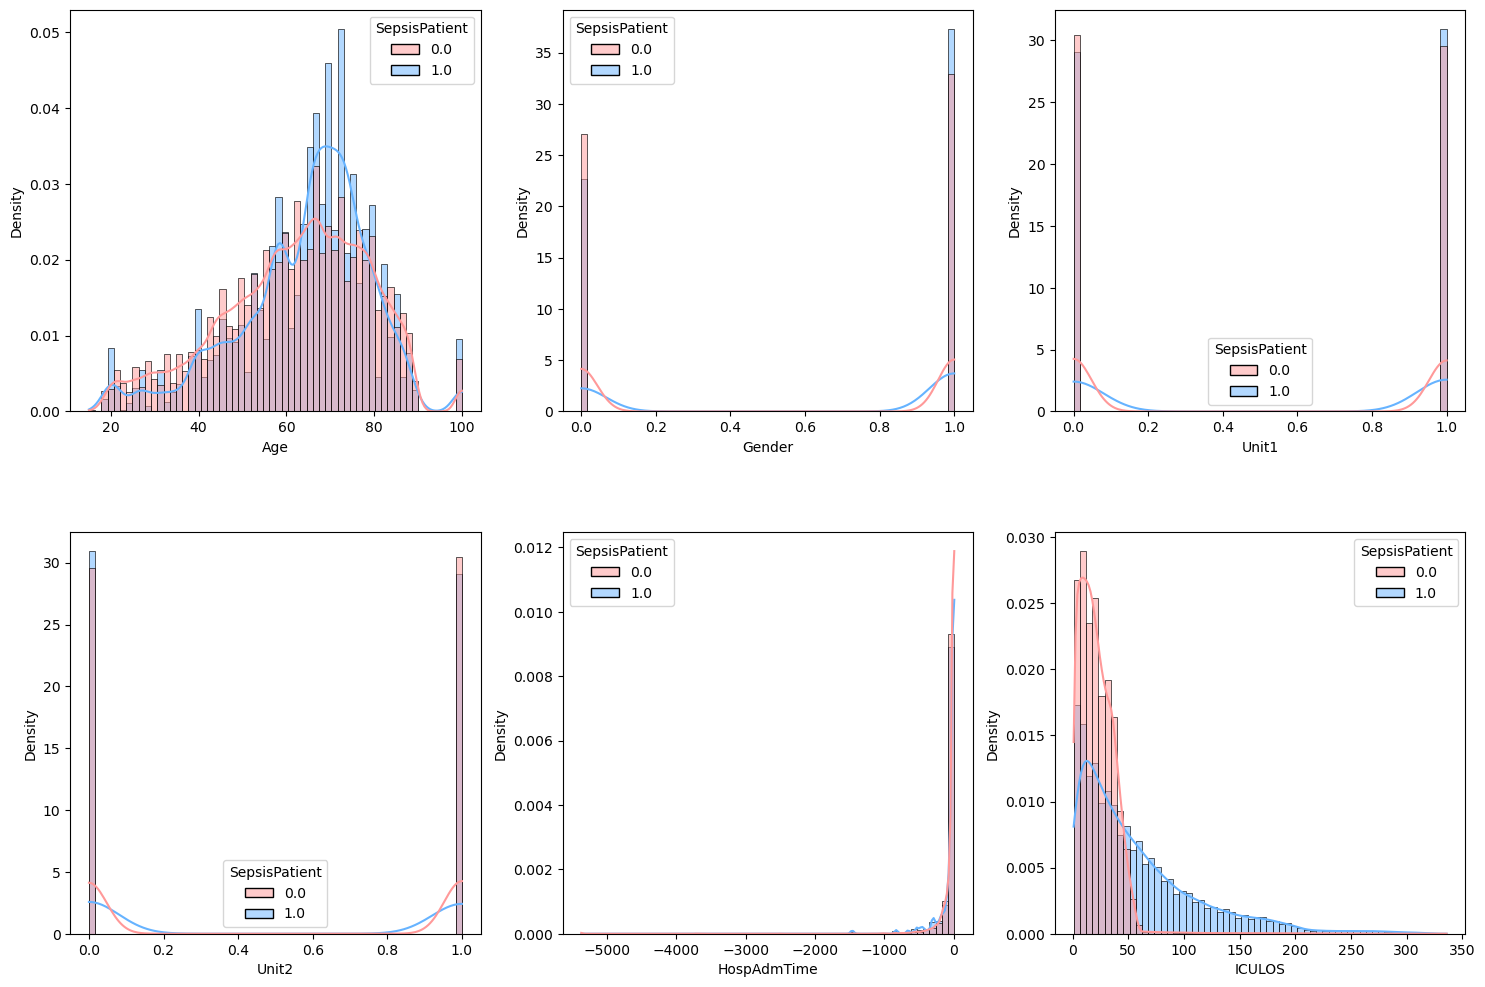

In [31]:
plt.figure(figsize=(18, 12))
plt.subplots_adjust(hspace=.3)
colors = ['#ff9999', '#66b3ff']
for i, column in enumerate(Demographics_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=train_data, x=column, hue=train_data['SepsisPatient'], stat="density", common_norm=False,
                 bins=60,
                 kde=True, palette=colors)

### Correlations - Laboratory Features

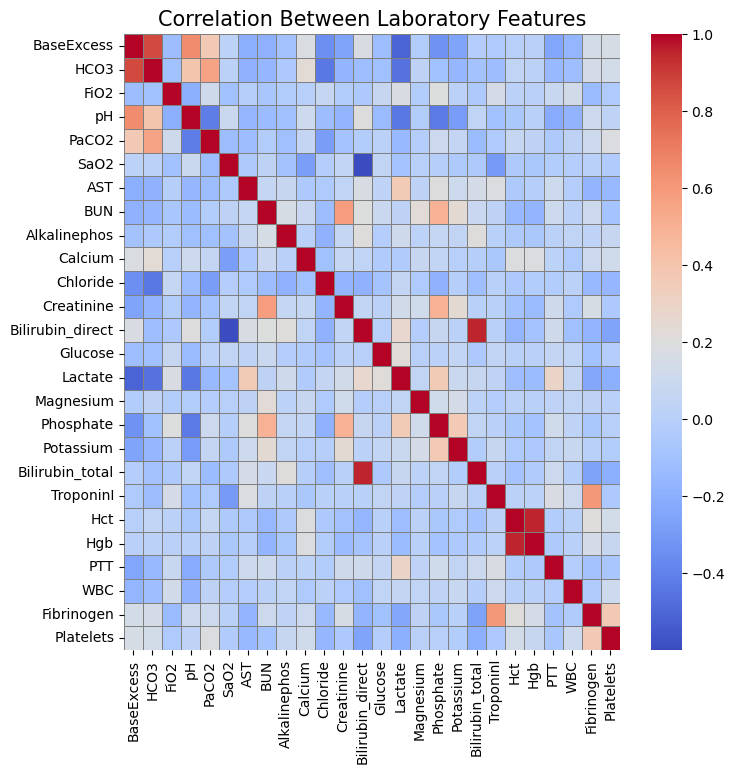

In [39]:
corr_matrix = train_data[Laboratory_features].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5, linecolor='gray')
plt.title('Correlation Between Laboratory Features', fontsize=15)
plt.show()

### Laboratory Features distribution


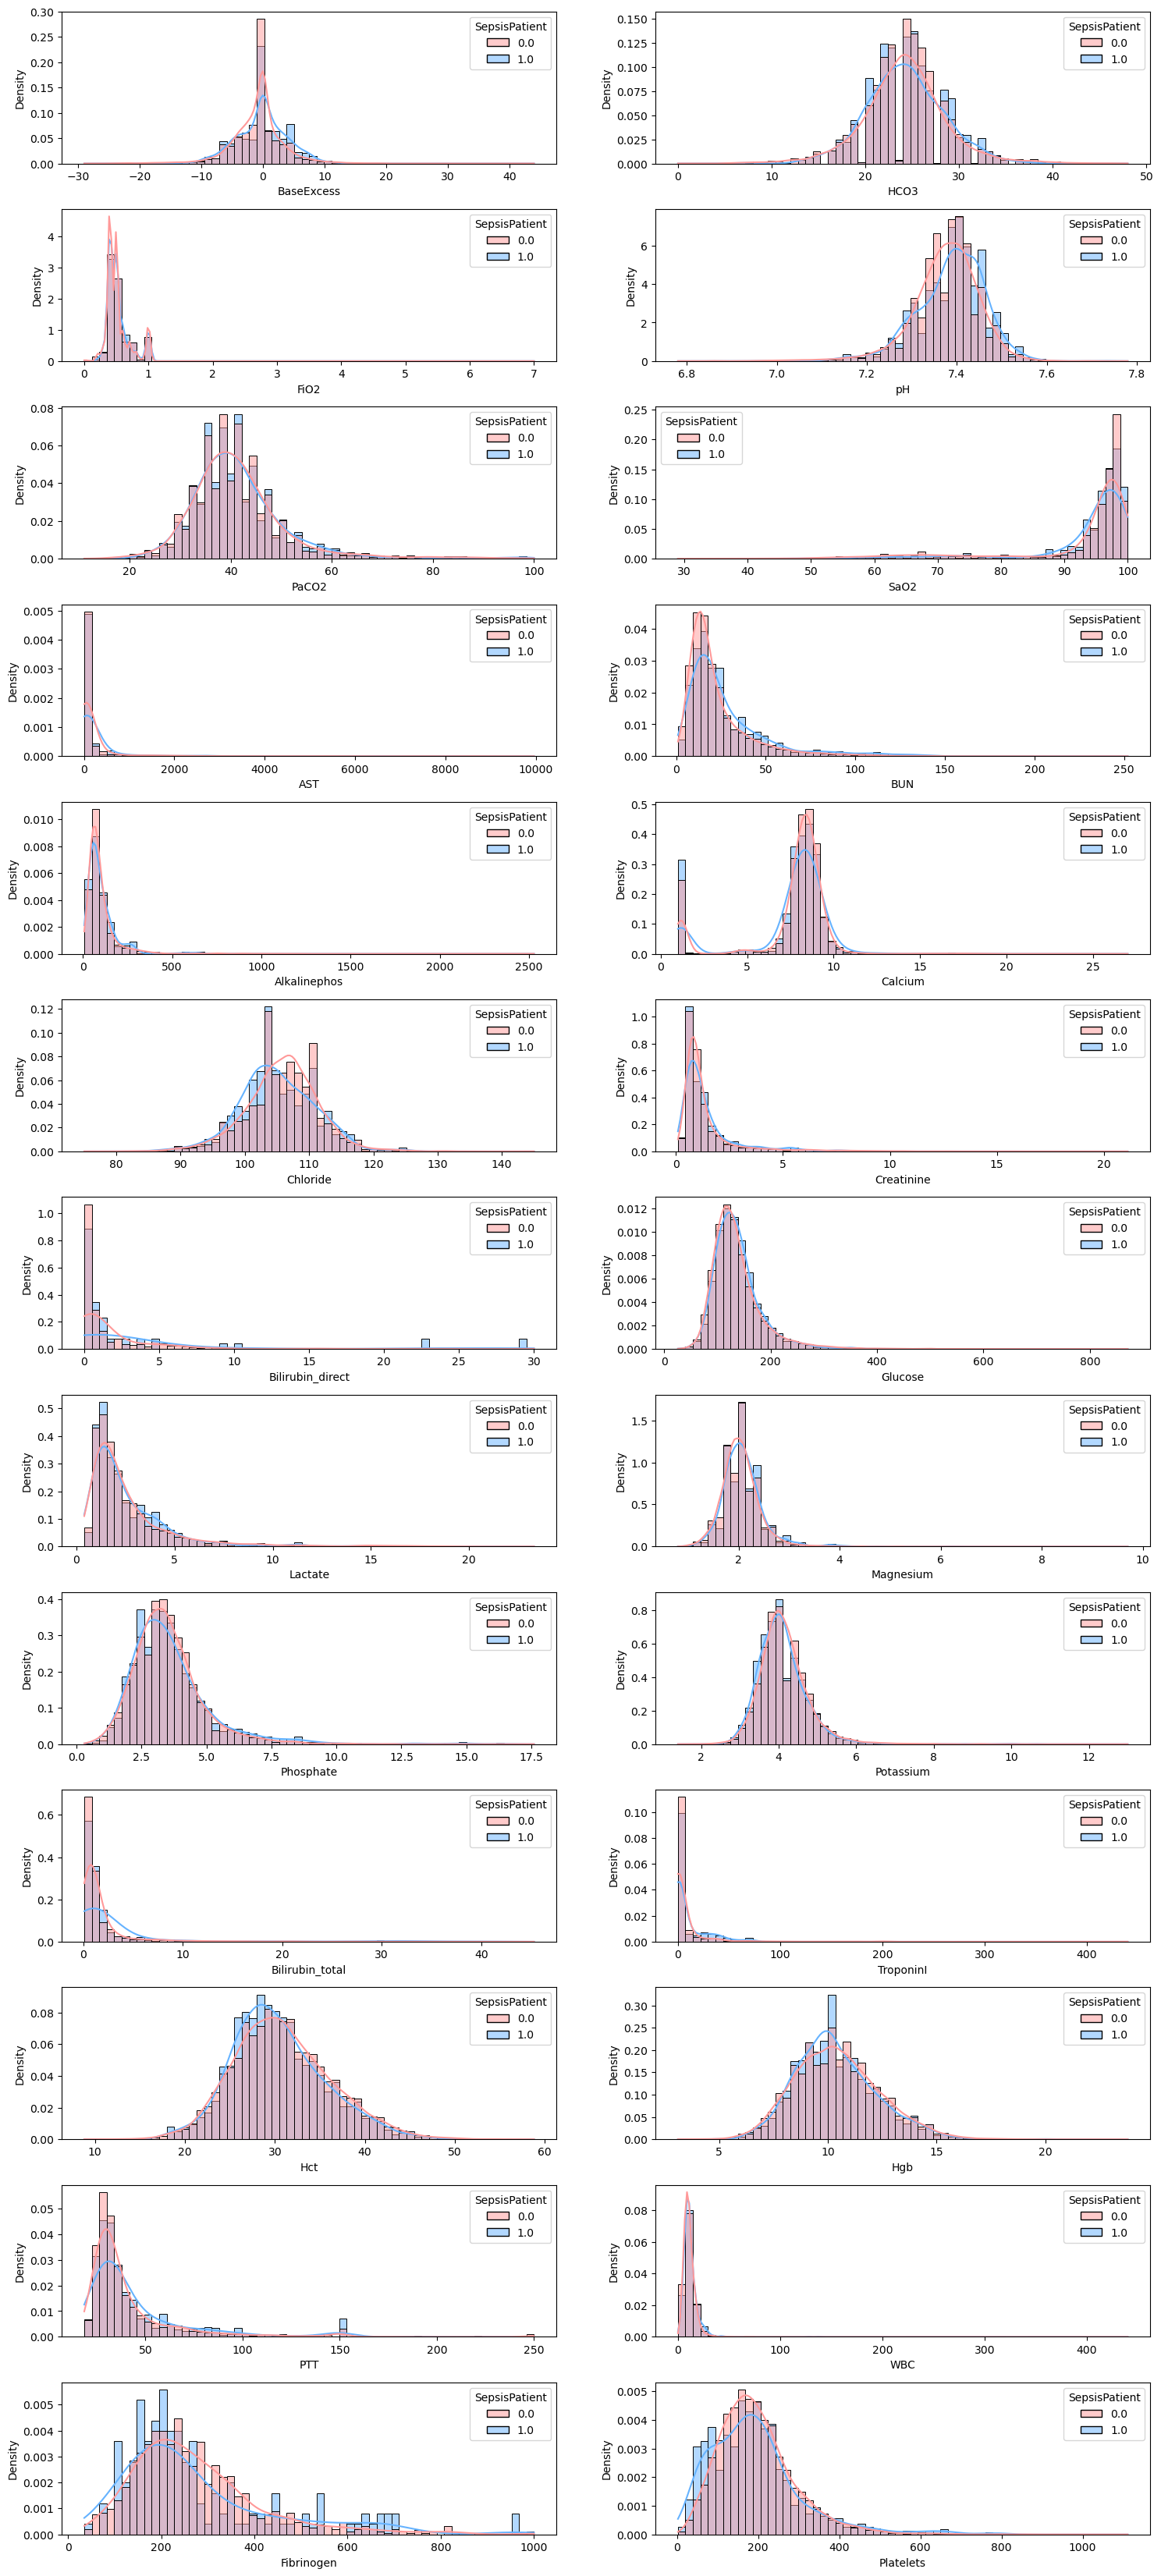

In [40]:
plt.figure(figsize=(18, 42))
plt.subplots_adjust(hspace=.3)
colors = ['#ff9999', '#66b3ff']
for i, column in enumerate(Laboratory_features, 1):
    plt.subplot(13, 2, i)
    sns.histplot(data=train_data, x=column, hue=train_data['SepsisPatient'], stat="density", common_norm=False,
                 bins=60, kde=True, palette=colors)


### Correlations - Vital Signs

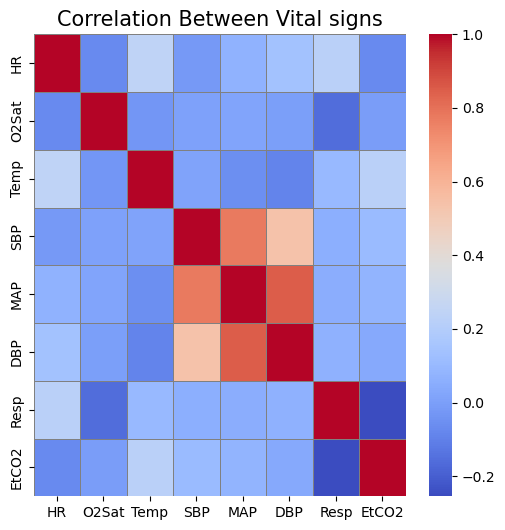

In [42]:
corr_matrix = train_data[Vital_signs].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5, linecolor='gray')
plt.title('Correlation Between Vital signs', fontsize=15)
plt.show()

###  Vital Signs distribution

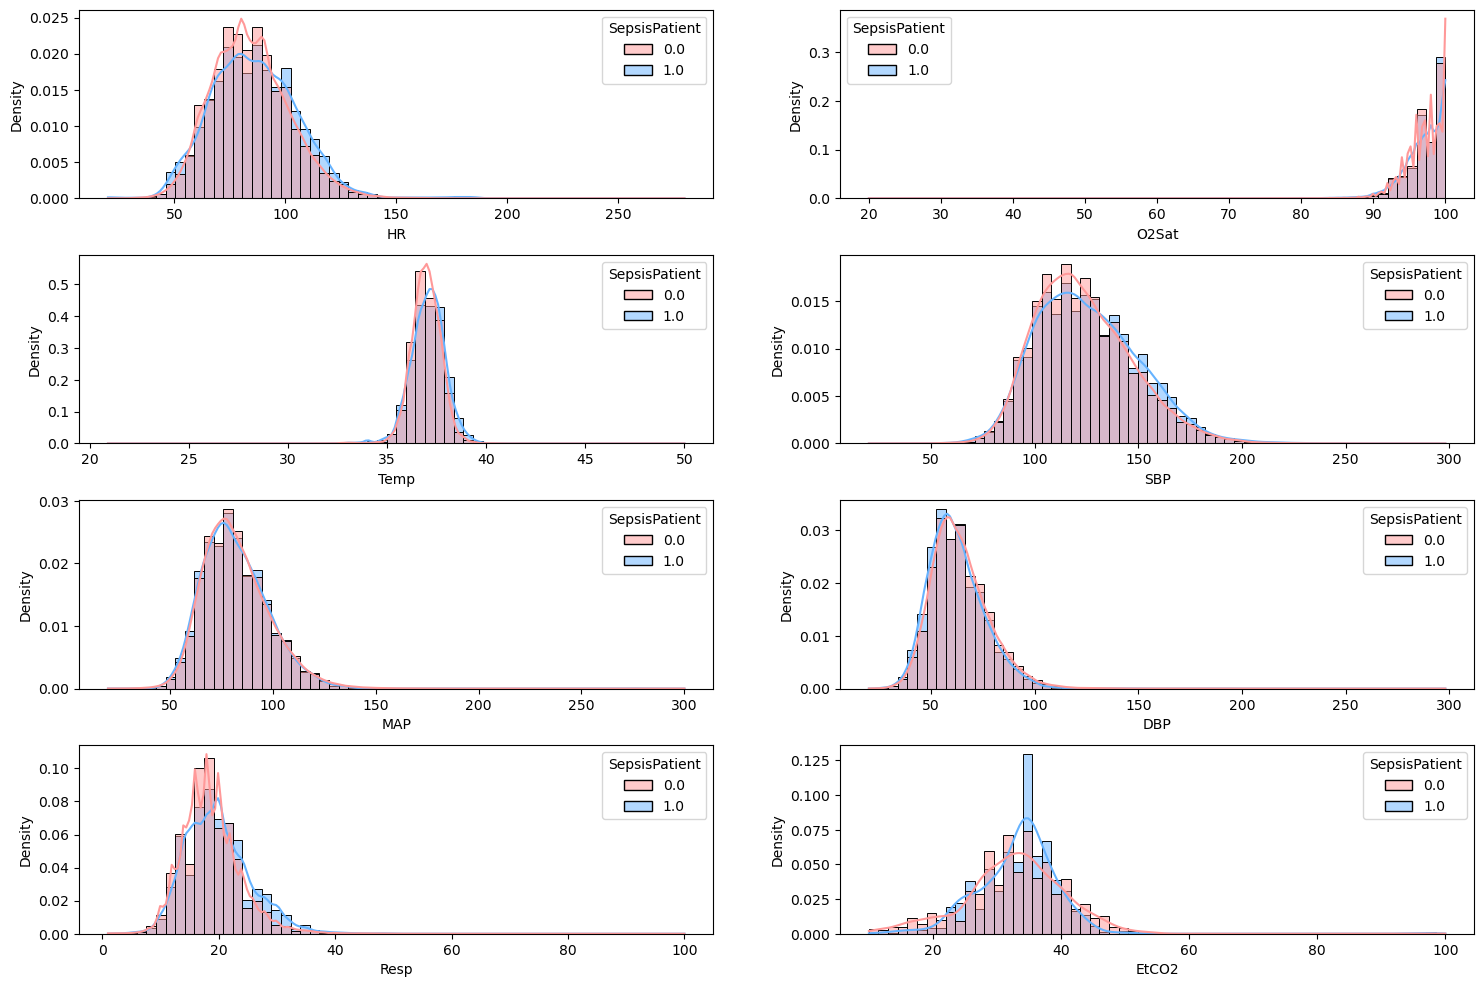

In [44]:
plt.figure(figsize=(18, 12))
plt.subplots_adjust(hspace=.3)
colors = ['#ff9999', '#66b3ff']
for i, column in enumerate(Vital_signs, 1):
    plt.subplot(4, 2, i)
    sns.histplot(data=train_data, x=column, hue=train_data['SepsisPatient'], stat="density", common_norm=False,
                 bins=60, kde=True, palette=colors)